# Final Report - Understanding Startup Success 

## Executive Summary
In this project we analyzed data from a [Kaggle Startup Success Dataset](https://www.kaggle.com/datasets/manishkc06/startup-success-prediction) to understand what determines the success of a startup using data on the success/failures of over 900 startups. We leverage patterns in industry trends, investment insights, and individual company information to analyze a startup's success. **We employed a variety of [classification-based machine learning models](#Results) to breakdown the most influential factors that go into predicting the success of startup companies.** We've included multiple graphs visualizing our ML results alongside as well. *It's important to note that this project is not intended to be a sole deciding factor for investors or venture capitalists alongside founders themselves but rather a tool to support or challenge their investment or startup decisions.*


## Introduction
Startups are typically launched by entrepreneurs with the aim of validating a scalable business model. In their early stage of development, they often require external support such as financial backing from investors or industry connections.

From an investor perspective, accurately predicting startup success, beyond mere intuition and rudimentary factors, to determine where to invest their money, proves to be an arduous and costly task. We began our project by building models that predict the success or failure of a startup, where **success** is *defined by attaining significant funding through an Initial-Public-Offering (IPO) or Merger & Acquisition* and **failure** is *defined by closing*. 

**We later shift our focus due to the fundamental flaws in a prediction model of this sort as [explained here](##Project+Pivot). We pivoted our focus towards comprehending patterns in startup success, with the goal of gaining deeper insights. In lieu of traditional approaches, we leveraged advanced machine learning classification models to effectively analyze and elucidate the key factors that contribute to success. This valuable information can empower investors to make more informed investment decisions, while also enabling founders to make better choices for their own success.**

## Data Description
### Import Kaggle Dataset
We used a [Kaggle Dataset of Startup Success](https://www.kaggle.com/datasets/manishkc06/startup-success-prediction) to observe a range of features related to each startup including location, industry, funding information. Below are some relevant columns:

- `age_first_funding_year` (quantitative): age of startup in years when it received its first funding round
- `age_last_funding_year` (quantitative): age of startup in years when it received its last funding round
- `relationships` (quantitative): number of known relationships the startup has with individuals, organizations, or other startups
- `funding_rounds` (quantitative): total number of funding rounds the startup has received
- `funding_total_usd` (quantitative): total amount of funding the startup has received in US dollars
- `milestones` (quantitative): total number of milestones achieved by the startup
- `age_first_milestone_year` (quantitative): age of the startup in years when it achieved its first milestone
- `age_last_milestone_year` (quantitative): age of the startup in years when it achieved its last milestone
- `state` (categorical): state or region that startup is located
- `industry_type` (categorical): industry/sector startup belongs
- `has_VC` (categorical): if startup has received venture capital funding
- `has_angel` (categorical): if startup has received angel investor funding
- `has_roundA` (categorical): if startup has received round A funding
- `has_roundB` (categorical): if startup has received round B funding
- `has_roundC` (categorical): if startup has received round C funding
- `has_roundD` (categorical): if startup has received round D funding
- `avg_participants` (quantitative): average number of participants in each funding round
- `is_top500` (categorical): if startup is ranked among the top 500 by website traffic
- `status`(acquired/closed) (categorical): indicating whether the startup has been acquired by another organization (succeeded) or closed

In [1]:
import pandas as pd

# Create dataframe with Kaggle dataset
data = pd.read_csv("startup data.csv")
df = pd.DataFrame(data)

### Data Cleaning and Feature Selection
We chose to drop a number of columns from our dataset in efforts to clean the data and conduct feature selection to ensure only relevant information is considered in our machine learning models. Below are explanations for each feature dropped:
- `Unnamed: 6`,`Unnamed: 0`: Contained data that was uninterpretable and not detailed by the provider of the dataset
- `id`, `name`, `object_id`: Identifiers of each startup that were not useful in making predictions or analyzing startup success
- `state_code.1`, `state_code`: We included the city, so we want to avoid repetition of the same data. City is a subset of state.
- `first_funding_at`, `last_funding_at`: We already included funding timeframe so this would also be a repetition of information.
- `zip_code`: This numeric value may be misinterpreted by the model and we already have included city as a location identifier.
- `founded_at`, `closed_at`: This was not very important to the prediction because these years have a lot of variance and don't speak to the outcome. 
- `age_last_milestone_year`, `age_first_milestone_year`: We already include the number of milestones so this would again be a repetition of information.

These explanations are logic and intuition-based, and this step is very important to avoid confusing our model with many similar features or irrelevant ones.

In [2]:
# Figure out which columns have null values
# print([i for i in df.columns if df[i].isnull().any()])

# Create a funding time frame column (derived feature)
df['funding timeframe (years)'] = df['age_last_funding_year'] - df['age_first_funding_year']

# Drop invaluable or null (NaN) columns
df.drop(['Unnamed: 6', 'Unnamed: 0', 'id', 'name', 'object_id', 'first_funding_at',
         'zip_code', 'founded_at', 'closed_at', 'age_last_milestone_year',
         'age_first_milestone_year', 'state_code.1',  'last_funding_at', 
         'age_last_funding_year', 'age_first_funding_year', 'state_code'], axis = 1, inplace = True)

# Drop outliers that severely misrepresent and skew the data
df = df.drop(df[df['funding_total_usd'] == 5700000000].index)

df

,latitude,longitude,city,labels,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,...,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,funding timeframe (years)
0,42.358880,-71.056820,San Diego,1,3,3,375000,3,1,0,...,0,1,0,0,0,0,1.0000,0,acquired,0.7534
1,37.238916,-121.973718,Los Gatos,1,9,4,40100000,1,1,0,...,1,0,0,1,1,1,4.7500,1,acquired,4.8713
2,32.901049,-117.192656,San Diego,1,5,1,2600000,2,1,0,...,0,0,1,0,0,0,4.0000,1,acquired,0.0000
3,37.320309,-122.050040,Cupertino,1,5,3,40000000,1,1,0,...,0,0,0,1,1,1,3.3333,1,acquired,2.1836
4,37.779281,-122.419236,San Francisco,0,2,2,1300000,1,1,0,...,1,1,0,0,0,0,1.0000,1,closed,1.6685
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,37.740594,-122.376471,San Francisco,1,9,1,1100000,2,1,0,...,0,0,1,0,0,0,6.0000,1,acquired,0.0000
919,42.504817,-71.195611,Burlington,0,1,3,52000000,1,0,0,...,1,0,0,1,0,0,2.6667,1,closed,1.9753
920,37.408261,-122.015920,Sunnyvale,0,5,1,44000000,1,1,0,...,0,0,0,0,0,1,8.0000,1,closed,0.0000
921,37.556732,-122.288378,San Francisco,1,12,2,15500000,2,1,0,...,0,0,1,1,0,0,1.0000,1,acquired,2.0740


### Data Preprocessing 
Applying **scale normalization** to the `funding_total_usd` column as it has numbers of large variance and significantly different form the format/scale of the other columns - this change is necessary to avoid confusing the model.

In [3]:
# scale normalization
df['funding_total_usd'] = df['funding_total_usd']/df['funding_total_usd'].std()

## Method
1. ML Classification Prediction Models - K-NN Prediction Model, Decision Tree, Random Forest, Logistic Regression
2. Explanation of Prediction Models
3. Project Pivot - Explanation of Shifting to using ML to Explain Startup Success
4. ML Classification Models (No Cross Validation) - Decision Tree, Random Forest
5. Explanation of Startup Success (Feature Importance)

In [4]:
# build x feature lists and y features for machine learning models
x_feat_list = [feat for feat in df.columns if feat not in ('labels', 'longitude', 'latitude') 
               and df.dtypes[feat] != object]


y_feat = 'status'

# create x and y variables
x = df.loc[:, x_feat_list].values
y = df.loc[:, y_feat].values

## Results
### ML Classification Prediction Models
Since our initial goal is to predict whether a startup will close or be acquired, we knew that we were working with a classification problem as opposed to regression. Our plan is to implement a variety of classifiers to make these predictions and evaluate the accuracies.

#### K-NN Classifier
**The KNN classifier utilizes cross-validated data to predict the fate of a startup, whether it will be acquired or closed, by analyzing the 20 most similar startups and their outcomes. After careful optimization of the k-value, we discovered that using 20 as the k-value resulted in the highest level of accuracy.**

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

from copy import copy

k = 20

# initialize a knn_classifier
knn_classifier = KNeighborsClassifier(n_neighbors=k)

# construction of kfold object
skfold = StratifiedKFold(n_splits=10)

# allocate an empty array to store predictions in
y_pred = copy(y)

for train_idx, test_idx in skfold.split(x, y):
    # build arrays which correspond to x, y train /test
    x_test = x[test_idx, :]
    x_train = x[train_idx, :]
    y_train = y[train_idx]
    
    # fit happens "inplace", we modify the internal state of knn_classifier to remember all the training samples
    knn_classifier.fit(x_train, y_train)

    # estimate status
    y_pred[test_idx] = knn_classifier.predict(x_test)

Text(0.5, 1.0, 'Accuracy of KNN Classifier with Different Values for K')

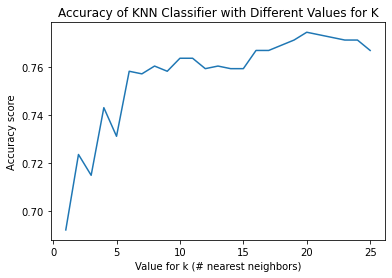

In [6]:
# find optimal k-value
def get_acc_score(k):
    ''' get accuracy score for a "k"
    
    Args: 
        k (int): k to be passed in the knn classifier
        
    Returns:
        acc (float): the accuracy score
    '''
    # initialize a knn_classifier
    knn_classifier = KNeighborsClassifier(n_neighbors=k)

    # construction of kfold object
    skfold = StratifiedKFold(n_splits=10)

    # allocate an empty array to store predictions in
    y_pred = copy(y)

    for train_idx, test_idx in skfold.split(x, y):
        # build arrays which correspond to x, y train /test
        x_test = x[test_idx, :]
        x_train = x[train_idx, :]
        y_train = y[train_idx]

        # fit happens "inplace", we modify the internal state of knn_classifier to remember all the training samples
        knn_classifier.fit(x_train, y_train)

        # estimate each instance
        y_pred[test_idx] = knn_classifier.predict(x_test)

    acc = accuracy_score(y, y_pred)
    
    return acc

# plot the accuracy scores
x_vals = list(range(1,26))
y_vals = list()
for k in range(25):
    y_vals.append(get_acc_score(k+1))
    
plt.plot(x_vals,y_vals)
plt.xlabel('Value for k (# nearest neighbors)')
plt.ylabel('Accuracy score')
plt.title('Accuracy of KNN Classifier with Different Values for K')

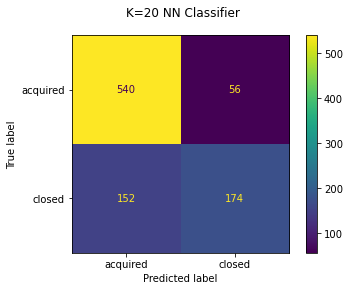

In [7]:
# build and plot confusion matrix
conf_mat = confusion_matrix(y_true=y, y_pred=y_pred)
conf_mat_disp = ConfusionMatrixDisplay(conf_mat, display_labels=np.unique(y))

#sns.set(font_scale=1.5)
conf_mat_disp.plot()
plt.suptitle('K=20 NN Classifier')
#plt.gcf().set_size_inches(6, 6)
plt.grid(False)

In [8]:
from sklearn.metrics import accuracy_score
knn_acc = accuracy_score(y, y_pred)
print(f'KNN Accuracy Score: {knn_acc}')

KNN Accuracy Score: 0.7744034707158352


**Explanation:** For this KNN classification model a function was used to find the optimal K-value of 20. Evidently from the confusion matrix and an accuracy score of around 76% this model seems to a fairly inaccurate binary classifier (a random-guesser would theoretically yield an accuracy of 50% for comparison).

#### Decision Tree
**With the aid of a decision tree classifier, a startup's features are compared to accurately classify it as either acquired or closed, based on the values of each feature. Our classifier was configured to a depth of 3, thus sorting various features into acquired or closed over three levels. The displayed features evidently possess the greatest influence in the variance of the data.**

Text(0.5, 1.0, 'Decision Tree Predicting Success (Max Depth = 3)')

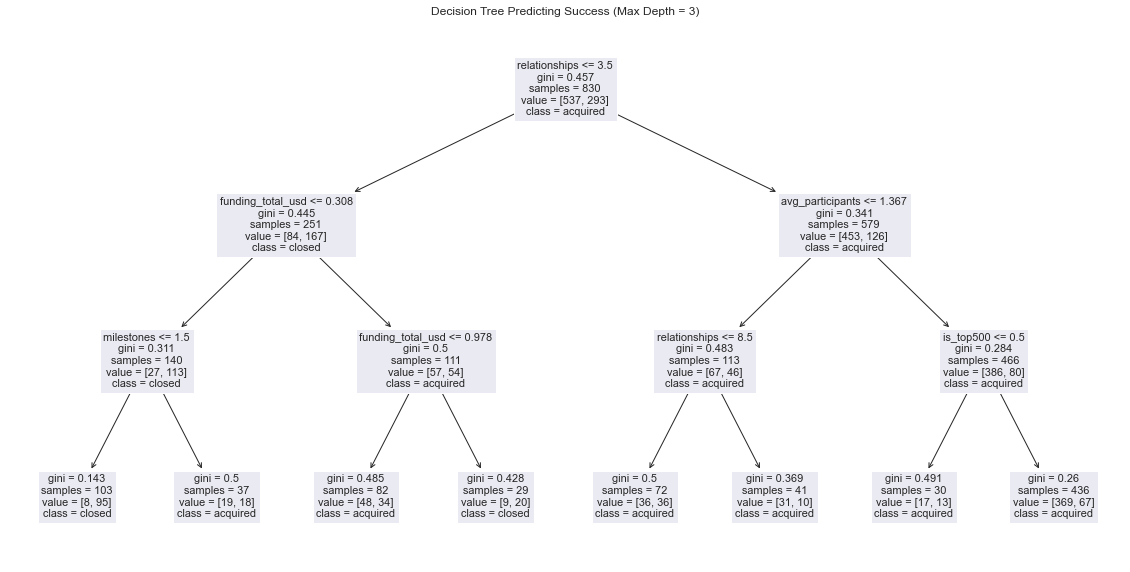

In [9]:
import seaborn as sns
from sklearn import tree
import matplotlib.pyplot as plt

n_splits = 10
max_depth = 3

# create folds for cross validation
kfold = StratifiedKFold(n_splits = n_splits)

# build decision tree classifier
dec_tree_clf = tree.DecisionTreeClassifier(max_depth=max_depth)

# create a copy of the same size to store predictions
y_pred = np.empty_like(y)

for train_idx, test_idx in kfold.split(x, y):
    # build arrays which correspond to x, y train /test
    x_train = x[train_idx, :]
    x_test = x[test_idx, :]
    y_train = y[train_idx]
    
    # fit data
    dec_tree_clf.fit(x_train, y_train)

    # estimate status
    y_pred[test_idx] = dec_tree_clf.predict(x_test)

# plotting tree
sns.set()
plt.gcf().set_size_inches(20, 10)
tree.plot_tree(dec_tree_clf, 
               feature_names=x_feat_list,
               class_names=dec_tree_clf.classes_);

plt.title('Decision Tree Predicting Success (Max Depth = 3)')

In [10]:
dt_acc = accuracy_score(y, y_pred)
print(f'Decision Tree Accuracy Score: {dt_acc}')

Decision Tree Accuracy Score: 0.7396963123644251


**Explanation:** This decision tree model for binary classification had an accuracy score of 74%, indicating poor performance in predicting outcomes. The model's weak performance could be due to either insufficient data or an oversimplified decision tree that resulted in underfitting. The tree model offers a valuable advantage in that it allows us to observe the importance of features and how this importance varies based on the conditions and paths at each node.

#### Random Forest
**We opted to implement a random forest classifier on our dataset as well because they are less prone to overfitting and tend to be stronger predictors. While keeping the decision trees' max depth at 3, we plotted a confusion matrix to provide a thorough analysis of our model's accuracy.**

In [11]:
from sklearn.model_selection import StratifiedKFold
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# build random forest classifier
n_splits = 10
max_depth = 3

y_feat_list = ['acquired', 'closed']

# create folds for cross validation
kfold = StratifiedKFold(n_splits = n_splits)

# build random forest
rf_clf = RandomForestClassifier(max_depth=max_depth)

y_pred = np.empty_like(y)

for train_idx, test_idx in kfold.split(x, y):
    # build arrays which correspond to x, y train /test
    x_train = x[train_idx, :]
    x_test = x[test_idx, :]
    y_train = y[train_idx]
    
    # fit data
    rf_clf.fit(x_train, y_train)

    # estimate tumor diagnosis
    y_pred[test_idx] = rf_clf.predict(x_test)

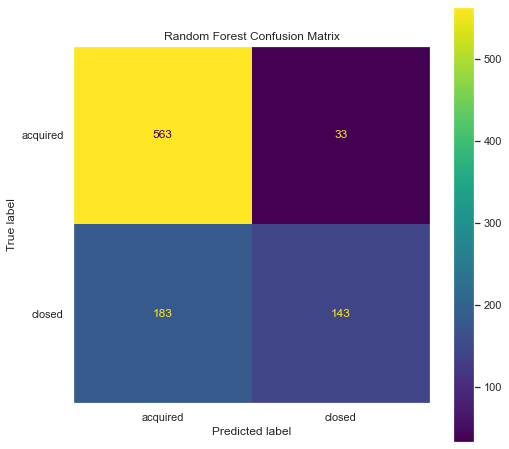

In [12]:
# plot confusion matrix
conf_mat = confusion_matrix(y_true=y, y_pred=y_pred)
conf_mat_disp = ConfusionMatrixDisplay(conf_mat, display_labels=y_feat_list)
conf_mat_disp.plot()
plt.gcf().set_size_inches(8, 8)
plt.title('Random Forest Confusion Matrix')
plt.grid(False)

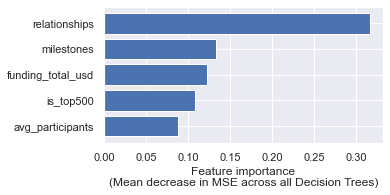

In [13]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

def plot_feat_import(feat_list, feat_import, sort=True, limit=None):
    """ plots feature importances in a horizontal bar chart
    
    Args:
        feat_list (list): str names of features
        feat_import (np.array): feature importances (mean gini reduce)
        sort (bool): if True, sorts features in decreasing importance
            from top to bottom of plot
        limit (int): if passed, limits the number of features shown
            to this value    
    """
    
    if sort:
        # sort features in decreasing importance
        idx = np.argsort(feat_import).astype(int)
        feat_list = [feat_list[_idx] for _idx in idx]
        feat_import = feat_import[idx] 
        
    if limit is not None:
        # limit to the first limit feature
        feat_list = feat_list[-limit:]
        feat_import = feat_import[-limit:]


    # plot and label feature importance
    plt.barh(feat_list, feat_import)
    plt.gcf().set_size_inches(5, len(feat_list) / 2)
    plt.xlabel('Feature importance\n(Mean decrease in MSE across all Decision Trees)')


plot_feat_import(x_feat_list, rf_clf.feature_importances_, limit=5)

In [14]:
rf_acc = accuracy_score(y, y_pred)
print(f'Random Forest Accuracy Score: {rf_acc}')

Random Forest Accuracy Score: 0.7657266811279827


**Explanation**: Like the previous models, the random forest may have a lower accuracy than ideal (with a random guess yielding 50% accuracy). However, the random forest also provides the unique advantage of allowing us to analyze feature importance across all decision trees. This comprehensive view of feature importance proves invaluable in interpreting the significance of different features for predicting startup success.

#### Logistic Regression 
**We also attempted to try a new model, logistic regression, which is designed to do classification-based predictions and less prone to overfitting compared to other complex models.**

In [15]:
from sklearn.linear_model import LogisticRegression

# create the splits for cross validation
skfold = StratifiedKFold(n_splits=5)

# use a binary feature list
y_feat_list = ['acquired', 'closed']

# build the logistic regression object
lr = LogisticRegression()

pred_lr = np.empty_like(y)

# run the cross validated predictions
for train_idx, test_idx in skfold.split(x, y):
    # build arrays which correspond to x, y train /test
    x_test = x[test_idx, :]
    x_train = x[train_idx, :]
    y_train = y[train_idx]
    
    lr.fit(x_train, y_train)
    pred_lr[test_idx] = lr.predict(x_test)

/Users/kkmanas/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/kkmanas/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

In [16]:
lr_acc = accuracy_score(y, pred_lr)
print(f'Logistic Regression Accuracy Score: {lr_acc}')

Logistic Regression Accuracy Score: 0.7635574837310195


**Explanation**: Our attempt to try logistic regression yielded similar results to the prior models with an accuracy score of around 77%. This also indicates weak performance taking into account that this is a binary classification problem.

### Explanation of Prediction Models
All the prediction models yielded relatively low accuracy scores between 70% and 80%, and are thus unsuitable in accomplishing our goal considering that a random-guesser would have 50% accuracy in a binary classification problem. 
#### *Ethical Considerations of Using a Prediction Model*
The dataset led to an unexpected finding: variables that we believed would be highly correlated with business success had little to no impact. A plot_feat_importance graph showed that Total_Funding_USD had similar importance to other variables like number of milestones, while number of relationships was three times as important. This suggests investors should not rely solely on funding amount, but also consider the business's reputation and backing. However, using these results to predict success could be unethical, particularly for novice investors. It's important to note that the dataset is limited to quantifiable data and does not capture many real-life factors that contribute to a business's success or failure, such as management style or worker dedication.

## Project Pivot

### *Shifting to using ML to Explain Startup Success*
During the implementation of our startup predictors, we discovered that certain data points, such as funding total, funding rounds, and milestones, may not always be available for startups in the process of acquiring investors. This limits the effectiveness of these features in our analysis. Additionally, our analysis revealed that investors may not necessarily base their investment decisions on the prior investments of other venture capitalists or angel investors, which detracts from our objective of providing investors with valuable insights to support their investment decisions.

After careful examination of the dataset, we determined that focusing solely on prediction using potentially incomplete or niche data was not the most effective approach. Instead, we decided to shift our focus to analyzing and interpreting the most critical factors that influence a startup's success. This pivot offers substantial value for investors such as venture capitalists and angels, as well as startup founders themselves. By understanding and leveraging these critical factors, investors can make more informed investment decisions, and founders can gain insights to help guide their business strategies towards greater success. Our focus on identifying these key success factors represents an invaluable resource for stakeholders across the startup ecosystem.

### Random Forest (No Cross Validation) - Feature Importance
We chose to use the random forest algorithm for our analysis because it offers the unique advantage of allowing us to **observe the feature importance across all decision trees**. This comprehensive view of feature importance provides valuable insights into the critical factors that contribute to startup success.

Additionally, we decided *not to use cross-validation* in this context because our focus is not on making predictions based on the available data. Instead, our objective is to identify and interpret the most important factors for startup success, and cross-validation is typically used for assessing the accuracy and robustness of prediction models. Since we are not using the data for making predictions, but rather for exploratory analysis, cross-validation is not necessary for our purposes.

#### Random Forest

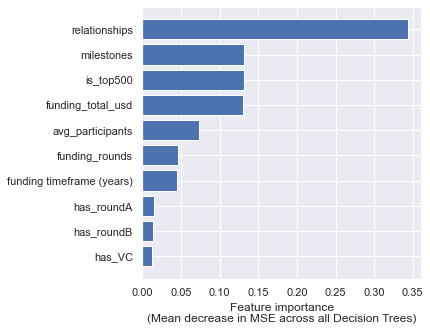

In [17]:
# build random forest classifier
max_depth = 3
rf_clf = RandomForestClassifier(max_depth=max_depth)

# fit it to the whole data
rf_clf.fit(x, y)

plot_feat_import(x_feat_list, rf_clf.feature_importances_, limit = 10)

## Discussion - Explanation of Startup Success (through feature importance)

Our analysis using a random forest classifier reveals that the number of relationships, number of milestones, total funding, and being in the top 500 are the most influential factors for startup success. The first two are significant - evidently, networking and industry connections play a crucial role in defining startup success. Milestones can also be attributed to success implying that founders/startups that are goal-oriented may have an advantage. Although these factors may not be entirely groundbreaking (especially the top 500 feature!), the exponential decrease in feature importance after these top predictors could be surprising to some individuals in the field.

*However, it is crucial to keep in mind that the results of our project should not be accepted at face value. There may be dataset bias or methodological issues that could affect the findings. It is essential to perform additional analysis and validate the results before taking any actions based on our findings.*

### Takeaway
Based on our analysis, one possible action that could be taken is to prioritize building relationships and achieving milestones in addition to obtaining funding. The top features identified by our model suggest that these factors have a significant impact on startup success. However, we must answer additional questions, such as how to accurately measure the number of relationships and milestones and how to prioritize them within the context of startup success. We do not think that these results would surprise folks in the field because (to-some-extent) startup success is attributed to current economic state as well as political/environmental factors that are difficult to all represent in a machine learning mode.

### Validating Feauture Importance Through Visualization
**We did mention that there is a stark shift in feature importance right after top 500 feature - in order to better understand this we revisited our earlier visualization and added the rounds of funding each startup got (can be seen by hovering on map below).**

In [ ]:
# Create dataframe for visualization
df_viz = pd.DataFrame(data)

# Create an industry column the compiles all the individual columns
df_viz['industry'] = df_viz.loc[:, 'is_software':'is_othercategory'].apply(lambda x: ', '.join([col[3:] for col in x.index if x[col] == 1]), axis=1)
df_viz['funding_round'] = df_viz.loc[:, 'has_roundA':'has_roundD'].apply(lambda x: ', '.join([col[3:] for col in x.index if x[col] == 1]), axis=1)

In [ ]:
import plotly.graph_objects as go
import pandas as pd
import numpy as np

# Define colorscale for status column
colorscale = [[0, 'red'], [1, 'green']]

# Define a dictionary to later map status values to colorscale index
color_mapper = {'closed': 0, 'acquired': 1}

# Map status column to colorscale index
df_viz['marker_color'] = df_viz['status'].map(color_mapper)

# Scale total funding column to best represent marker sizes in visualization
df_viz['log_funding_total_usd'] = np.log10(df_viz['funding_total_usd'])*4

# Create array with all funding values to add in the marker hover
customdata = [[x, y] for x, y in zip(df_viz['funding_total_usd'], df_viz['funding_round'])]

# Build the figure
fig = go.Figure()

# Create two invisible markers to represent 'closed' and 'acquired' in the legend
fig.add_trace(go.Scattergeo(lat=[None], lon=[None], name='Closed',
                             marker=dict(color='red'), showlegend=True, mode='markers'))
fig.add_trace(go.Scattergeo(lat=[None], lon=[None], name='Acquired',
                             marker=dict(color='green'), showlegend=True, mode='markers'))

# Create the trace that shows the data on the map and builds out the hover tool
fig.add_trace(go.Scattergeo(lon=df_viz['longitude'], lat=df_viz['latitude'], text=df_viz['name'], mode='markers',
                            marker=dict(color=df_viz['marker_color'], colorscale=colorscale, 
                                        size=df_viz['log_funding_total_usd']),
                            hovertemplate="<b>Funding Rounds:</b> %{customdata[1]}<br>" +
                                          "<b>Company:</b> %{text}<br>" +
                                          "<b>Total Funding:</b> $%{customdata[0]:,.2f}<extra></extra>",
                            showlegend=False,
                            customdata=customdata))


# Add a title and legend
fig.update_layout(title='Startup Success across USA', geo_scope='usa', legend_title_text='Startup Status')

fig.show()

Visualizing the specific rounds of funding allows us validate that funding rounds are not an important feature, as shown in the random forest feature importance graph. Through hovering over various startups, there is no evident pattern in the green startups having more or less rounds of funding, challenging our existing assumptions. 

### Ethical Implications
We recognize that there are ethical implications to using machine learning algorithms to predict startup success. Our project could reinforce existing power dynamics and inequalities present within the startup ecosystem, some of which are that acquiring finding is significantly more difficult for women of color and minorities. For example, the use of the top 500 as a feature may reinforce existing power structures and inequalities. Therefore, we must consider these ethical implications carefully and ensure that our findings do not exacerbate these issues.

In conclusion, while our findings provide valuable insights into the factors that contribute to startup success, it is essential to consider additional factors and to validate our results before taking any action. We must also carefully consider the ethical implications of our project and take steps to mitigate any potential biases or negative consequences.